In [0]:
!pip install tbcontrol
!pip install control

     |████████████████████████████████| 256kB 3.4MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=43ed1281aa0337636a1c574a115d5742f4d296c146a87a2d1c22c7fedc76d07d
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


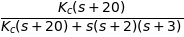

In [0]:

import sympy
from sympy import degree
from sympy import poly
from tbcontrol.symbolic import routh
sympy.init_printing()

s = sympy.Symbol('s')
K_c, t = sympy.symbols('K_c, t', positive=True)

#G_p = K_c/(s*(s + 7)*(s+11))
G_p = K_c*(s+20)/(s*(s + 2)*(s + 3))
forward = G_p
backward = 1

G_CL = backward*forward/(1 + forward*backward)
sympy.simplify(G_CL)


# Generating a Basic Routh Table

If we have this system with this Transfer function

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-09-34.png?raw=true' />
</figure>

We can create Routh Table

<figure>
<center>
<img src='https://github.com/ali493/ControlNise/blob/master/Screenshot%20from%202020-06-14%2001-07-34.png?raw=true' />
</figure>




In [0]:
ce = sympy.denom(G_CL.simplify())
Poly_ce = poly(ce,s)
A = routh(Poly_ce)
routh(Poly_ce)

⎡    1       K_c + 6⎤
⎢                   ⎥
⎢    5       20⋅K_c ⎥
⎢                   ⎥
⎢-3⋅K_c + 6     0   ⎥
⎢                   ⎥
⎣  20⋅K_c       0   ⎦

In [0]:
sympy.solve([e > 0 for e in A[:, 0]], K_c)